In [2]:
import pandas as pd
import plotly.graph_objects as go
import datetime as dt


In [4]:
pair = 'GBP_USD'
granularity = 'H4'
df = pd.read_pickle(f'../data/{pair}_{granularity}.pkl')

In [43]:
df.tail()

,time,volume,mid_o,mid_h,mid_l,mid_c,bid_o,bid_h,bid_l,bid_c,ask_o,ask_h,ask_l,ask_c,s_time
4994,2024-05-28 05:00:00+00:00,13138,1.27747,1.27812,1.27626,1.27690,1.27738,1.27804,1.27618,1.27681,1.27756,1.27820,1.27634,1.27698,s24-05-28 05:00
4995,2024-05-28 09:00:00+00:00,14400,1.27689,1.27948,1.27638,1.27924,1.27681,1.27938,1.27628,1.27916,1.27697,1.27957,1.27647,1.27931,s24-05-28 09:00
4996,2024-05-28 13:00:00+00:00,17628,1.27922,1.28008,1.27708,1.27766,1.27914,1.28001,1.27700,1.27758,1.27931,1.28016,1.27715,1.27774,s24-05-28 13:00
4997,2024-05-28 17:00:00+00:00,12899,1.27766,1.27782,1.27541,1.27619,1.27758,1.27773,1.27532,1.27610,1.27773,1.27790,1.27550,1.27628,s24-05-28 17:00
4998,2024-05-28 21:00:00+00:00,7012,1.27602,1.27660,1.27522,1.27542,1.27565,1.27632,1.27495,1.27534,1.27640,1.27731,1.27529,1.27549,s24-05-28 21:00


In [42]:
df['s_time'] = [dt.datetime.strftime(t, 's%y-%m-%d %H:%M') for t in df['time']]

In [44]:
plot_df = df.iloc[:100]

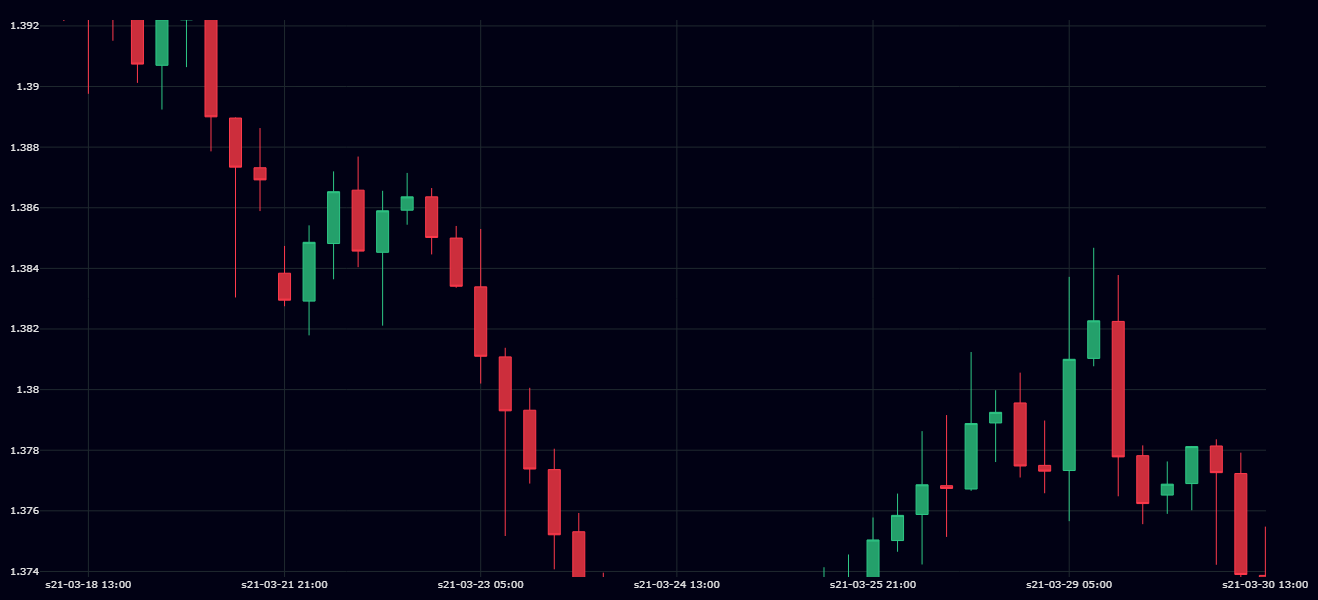

In [47]:
fig = go.Figure()

fig.add_trace(go.Candlestick(
    x=plot_df['s_time'],
    open=plot_df['mid_o'],
    high=plot_df['mid_h'],
    low=plot_df['mid_l'],
    close=plot_df['mid_c'],
    line={'width': 1},
    opacity=1,
    increasing_fillcolor='#24a06b',
    decreasing_fillcolor='#cc2e3c',
    increasing_line_color='#2ec886',
    decreasing_line_color='#ff3a4c'
))

fig.update_yaxes(
    gridcolor='#1f292f'
)

fig.update_xaxes(
    gridcolor='#1f292f',
    rangeslider={'visible': False},
    nticks=7
)

fig.update_layout(
    width=1000,
    height=600,
    margin={'l': 10, 'r': 10, 'b': 20, 't': 20},
    paper_bgcolor='#010114',
    plot_bgcolor='#010114',
    font={'size': 10, 'color': '#e1e1e1'}
)

fig.show()